In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Datasets To Train/Classification/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
counts = df['Ticket'].value_counts().reset_index()
counts.columns = ['Ticket', 'Count']
counts

,Ticket,Count
0,347082,7
1,1601,7
2,CA. 2343,7
3,3101295,6
4,CA 2144,6
...,...,...
676,PC 17590,1
677,17463,1
678,330877,1
679,373450,1


In [5]:
counts = df['Cabin'].value_counts().reset_index()
counts.columns = ['Cabin', 'Count']
counts

,Cabin,Count
0,G6,4
1,C23 C25 C27,4
2,B96 B98,4
3,F2,3
4,D,3
...,...,...
142,E17,1
143,A24,1
144,C50,1
145,B42,1


In [6]:
counts = df['Name'].value_counts().reset_index()
counts.columns = ['Name', 'Count']
counts

,Name,Count
0,"Dooley, Mr. Patrick",1
1,"Braund, Mr. Owen Harris",1
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
3,"Heikkinen, Miss. Laina",1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
...,...,...
886,"Hewlett, Mrs. (Mary D Kingcome)",1
887,"Vestrom, Miss. Hulda Amanda Adolfina",1
888,"Andersson, Mr. Anders Johan",1
889,"Saundercock, Mr. William Henry",1


In [7]:
counts = df['Pclass'].value_counts().reset_index()
counts.columns = ['Pclass', 'Count']
counts

,Pclass,Count
0,3,491
1,1,216
2,2,184


In [8]:
counts = df['Embarked'].value_counts().reset_index()
counts.columns = ['Embarked', 'Count']
counts

,Embarked,Count
0,S,644
1,C,168
2,Q,77


In [9]:
counts = df['SibSp'].value_counts().reset_index()
counts.columns = ['SibSp', 'Count']
counts

,SibSp,Count
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


In [10]:
counts = df['Sex'].value_counts().reset_index()
counts.columns = ['Sex', 'Count']
counts

,Sex,Count
0,male,577
1,female,314


In [11]:
df = df.drop(["Name", "Ticket", "Cabin"], axis=1)

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

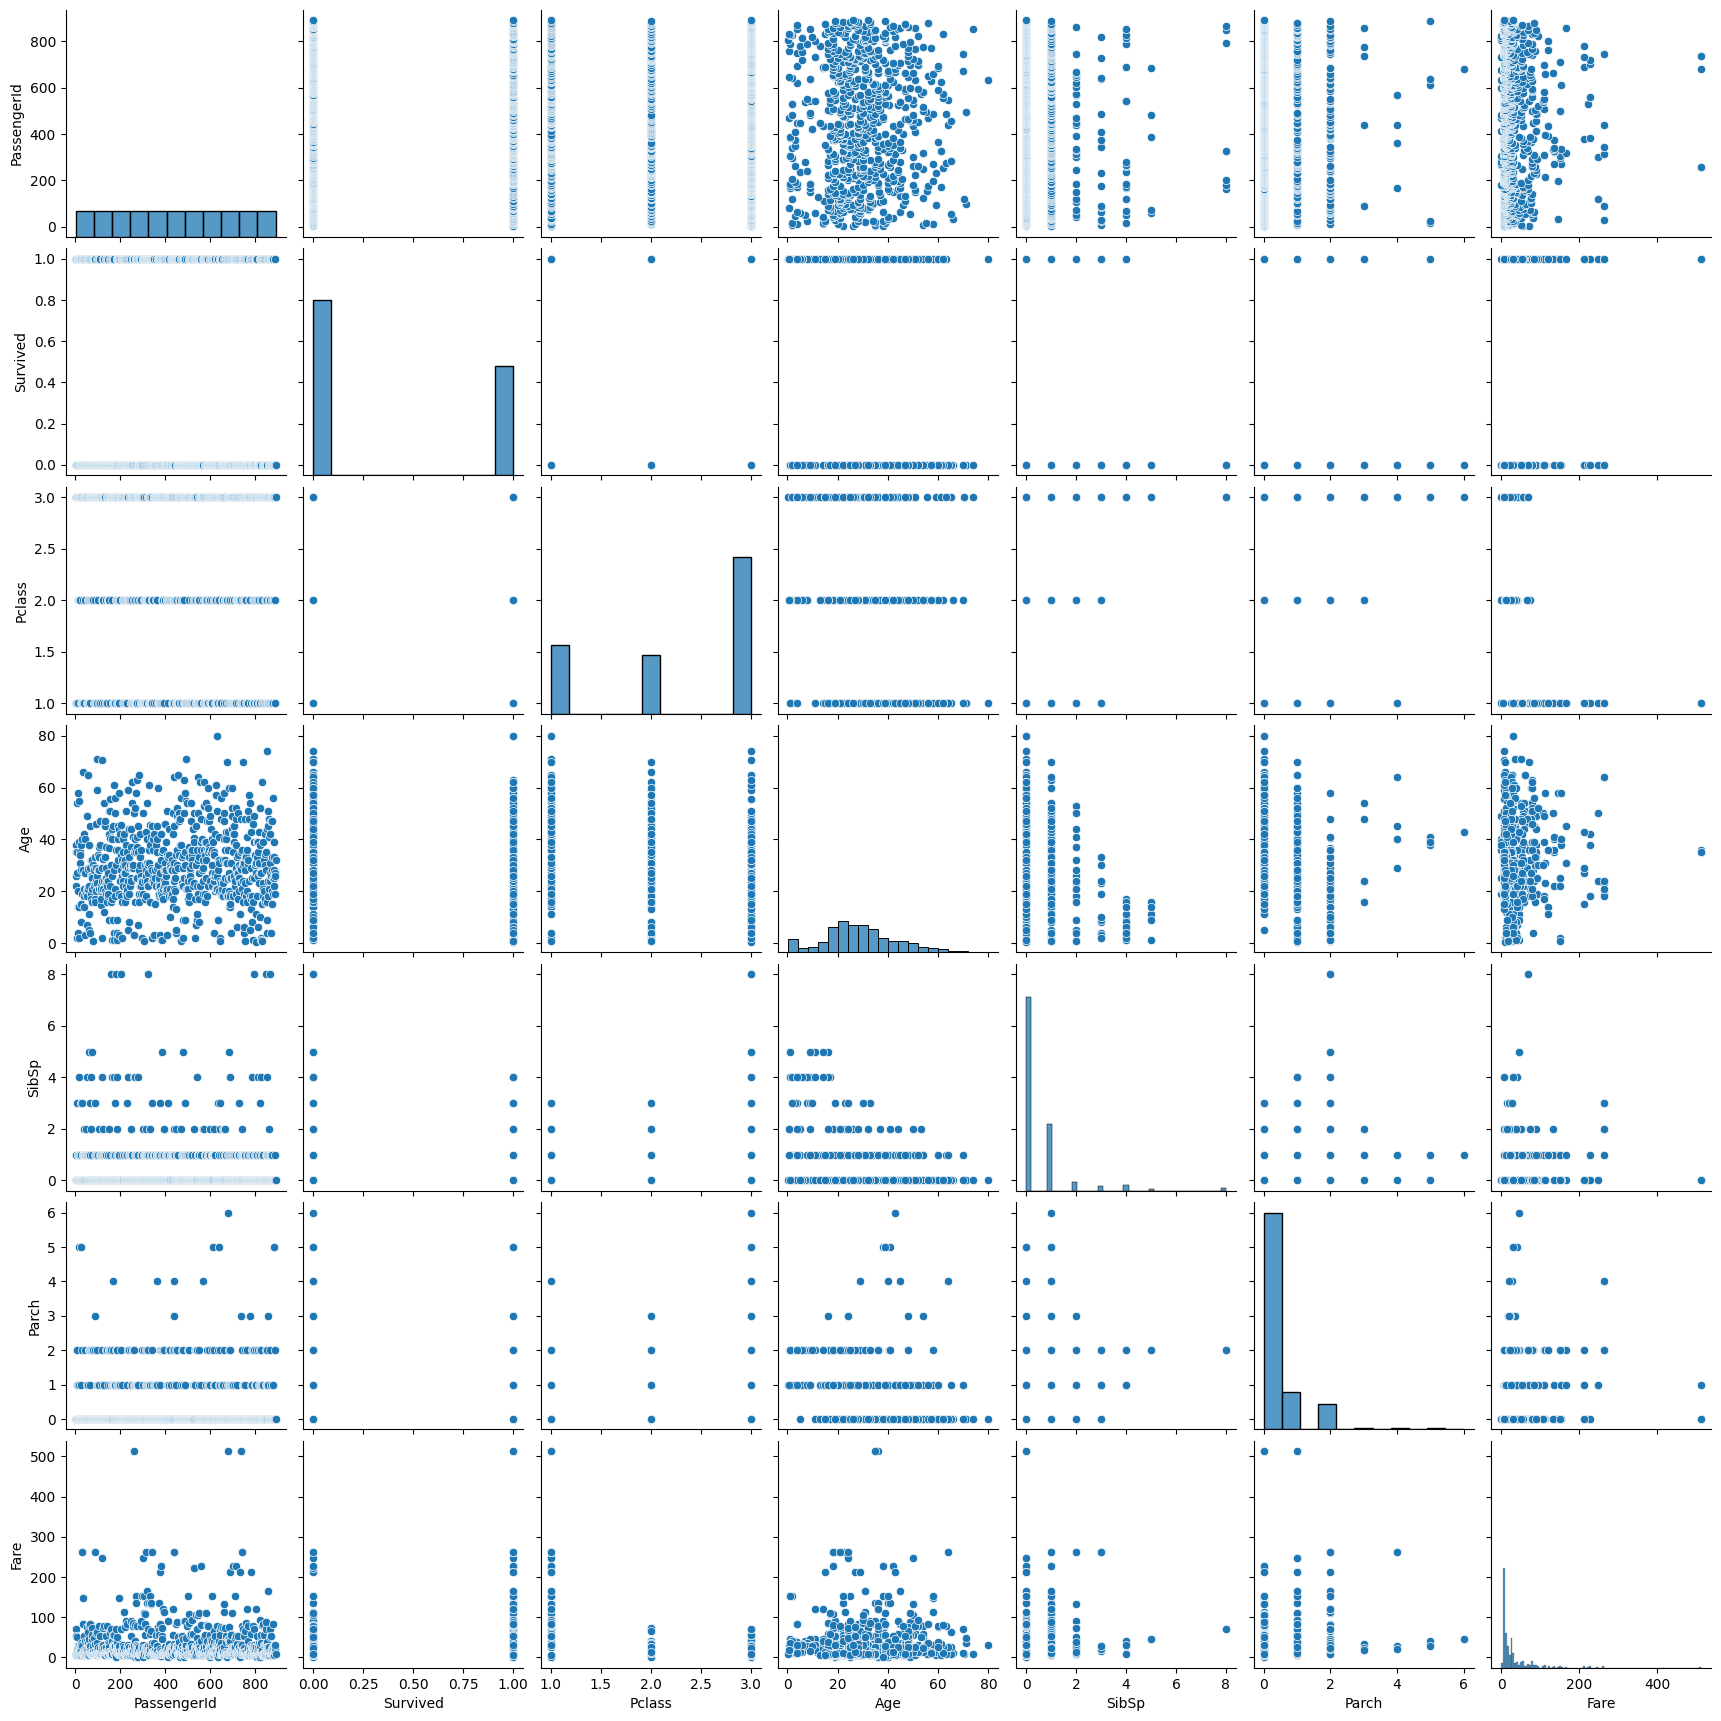

In [13]:
import seaborn as sns

sns.pairplot(df)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [15]:
df["encoded_Embarked"] = le.fit_transform(df['Embarked'])

In [16]:
df["encoded_Sex"] = le.fit_transform(df['Sex'])

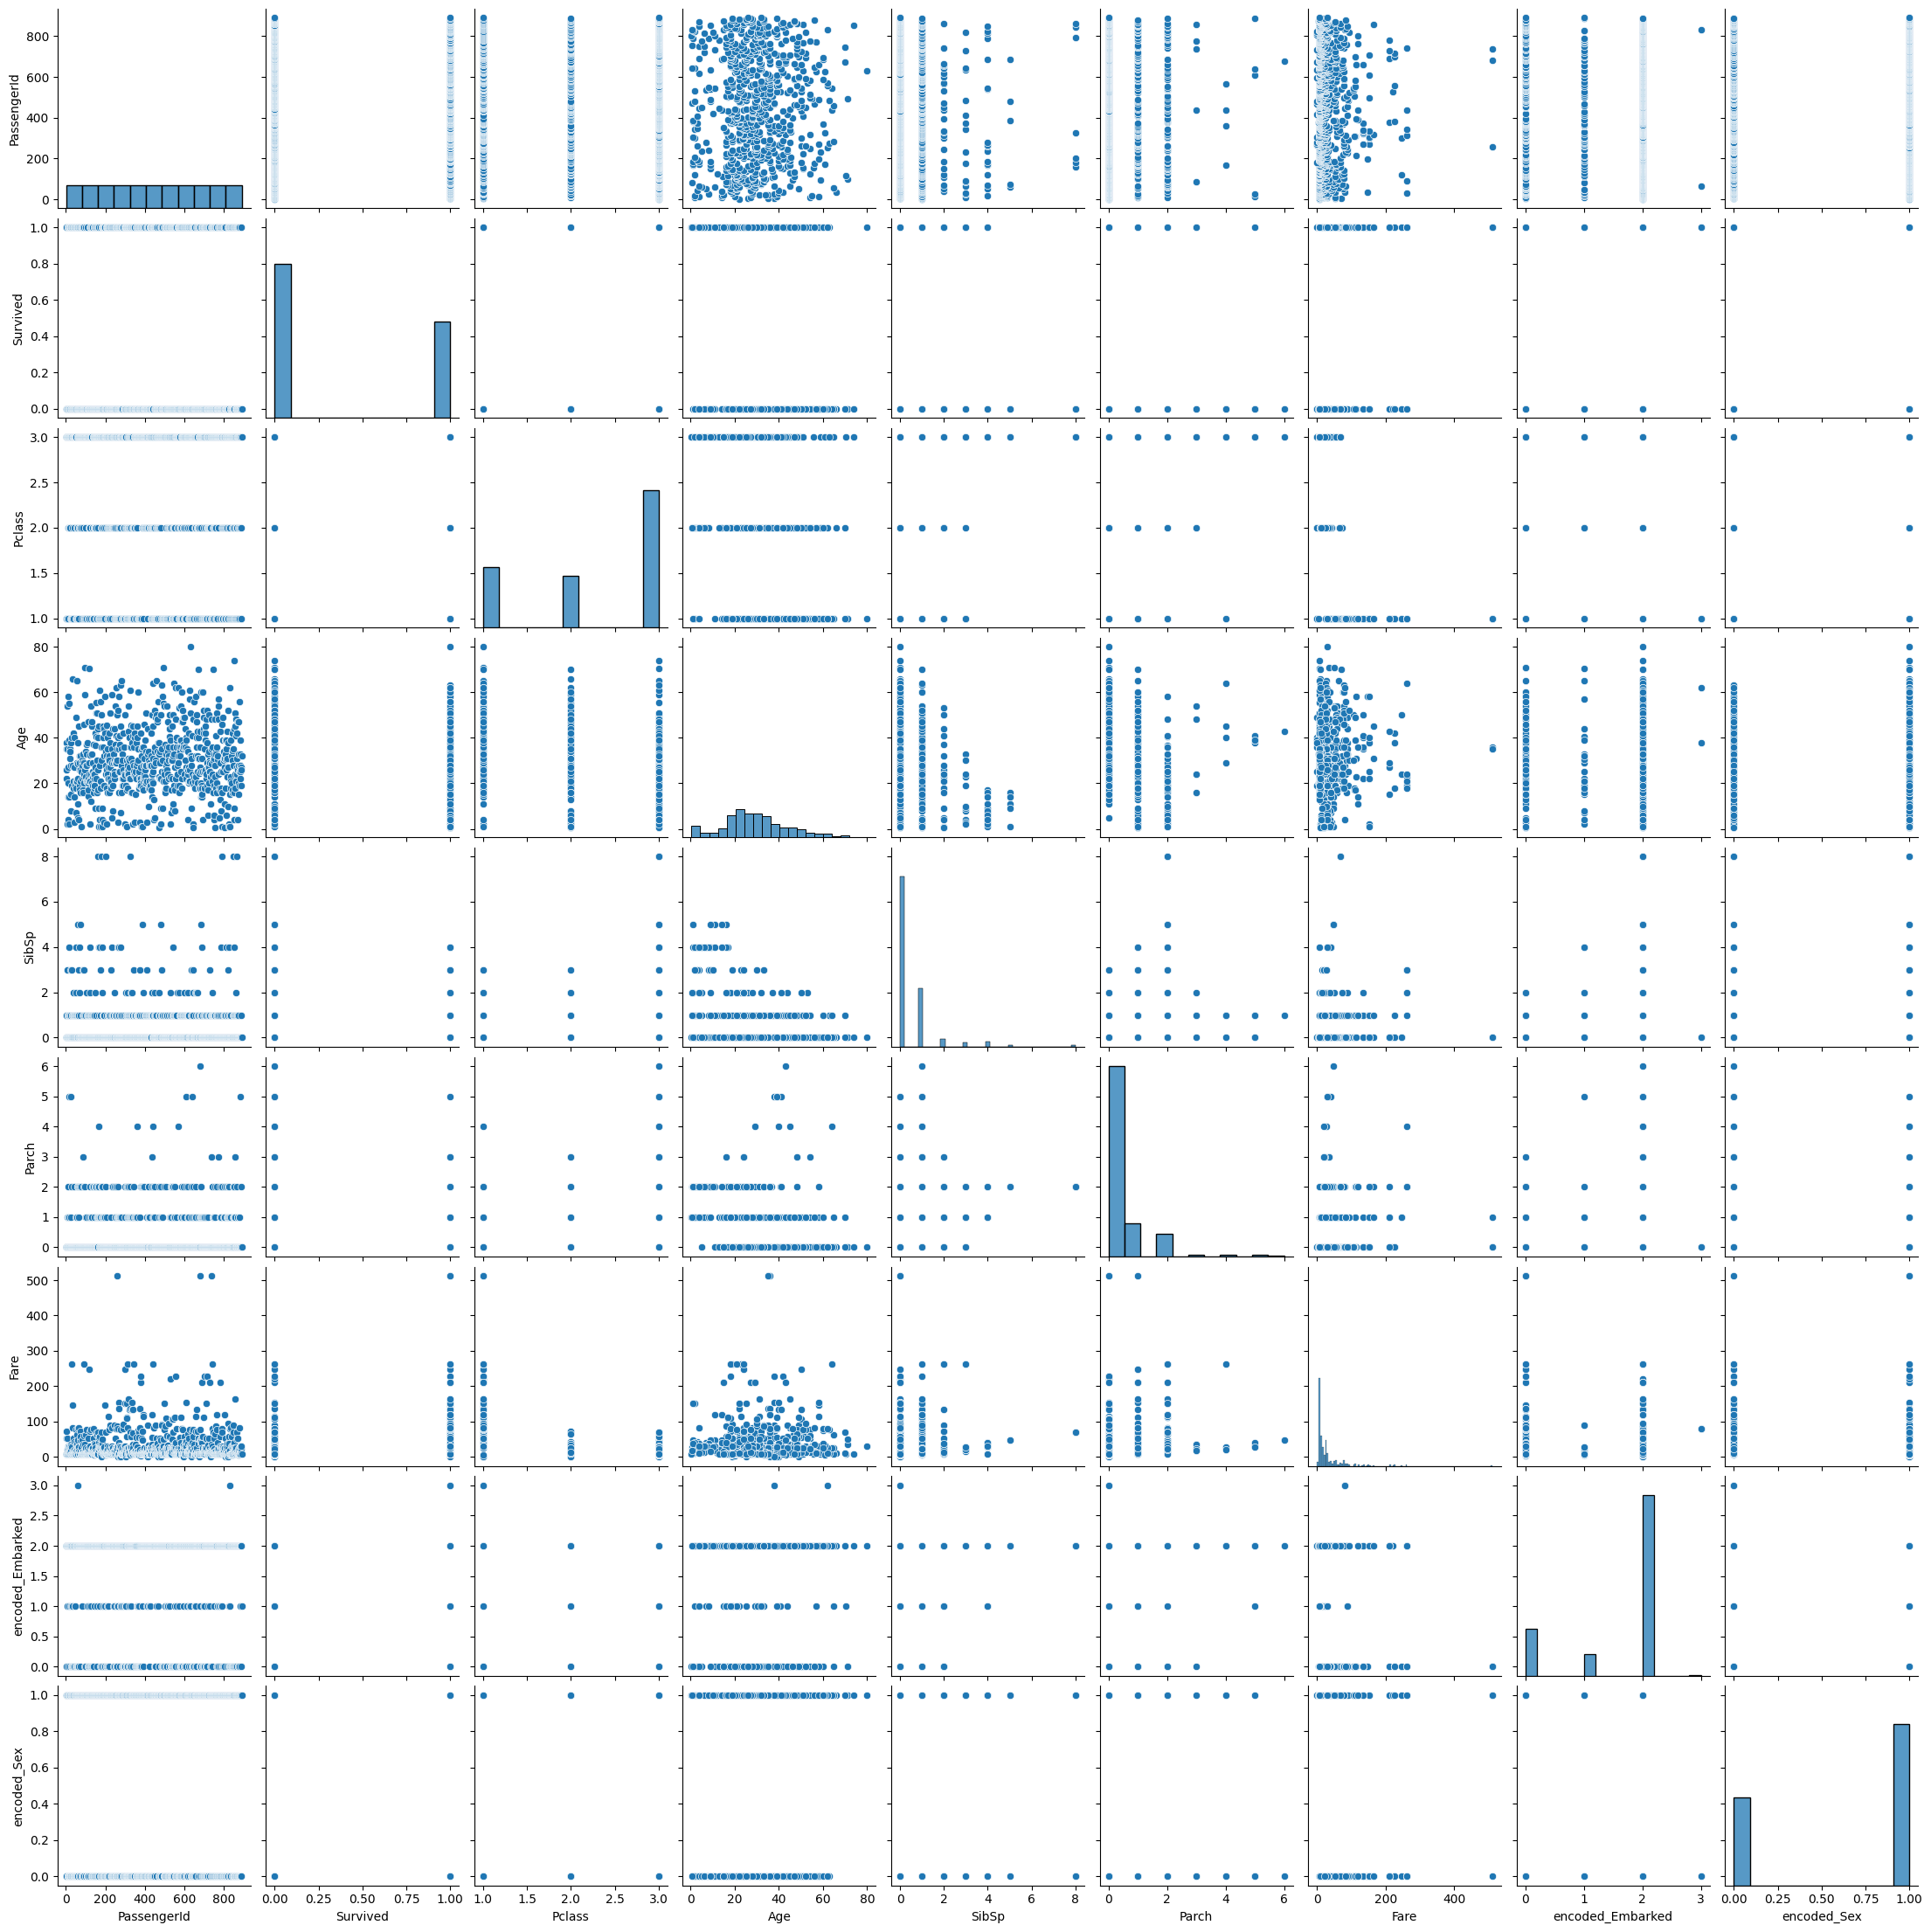

In [17]:
sns.pairplot(df)

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'encoded_Embarked', 'encoded_Sex'],
      dtype='object')

In [19]:
df.isnull().sum().reset_index()

,index,0
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Sex,0
4,Age,177
5,SibSp,0
6,Parch,0
7,Fare,0
8,Embarked,2
9,encoded_Embarked,0


In [20]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [21]:
df = df.dropna()

In [22]:
df.isnull().sum().reset_index()

,index,0
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Sex,0
4,Age,0
5,SibSp,0
6,Parch,0
7,Fare,0
8,Embarked,0
9,encoded_Embarked,0


In [23]:
X = df.drop(["Survived", "Sex", "Embarked", "PassengerId"], axis=1)

In [24]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'encoded_Embarked',
       'encoded_Sex'],
      dtype='object')

In [25]:
Y = df.Survived

In [26]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=143)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [30]:
prediction = knn.predict(X_test)

In [31]:
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1])

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(Y_test, prediction)

In [33]:
cm

array([[86, 19],
       [41, 32]])

In [34]:
accuracy_sklearn = accuracy_score(Y_test, prediction)
print(f"\nAccuracy (scikit-learn): {accuracy_sklearn:.2f}")


Accuracy (scikit-learn): 0.66


In [35]:
X

,Pclass,Age,SibSp,Parch,Fare,encoded_Embarked,encoded_Sex
0,3,22.0,1,0,7.2500,2,1
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,2,0
3,1,35.0,1,0,53.1000,2,0
4,3,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,2,1
887,1,19.0,0,0,30.0000,2,0
888,3,28.0,1,2,23.4500,2,0
889,1,26.0,0,0,30.0000,0,1


In [36]:
X['Age'].min()

0.42

In [37]:
X['Age'].max()

80.0

In [38]:
X['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [39]:
def fun():
  Pclass = int(input("Pclass [Note: Pleasae enter a value between 1 and 3] : "))
  Age = int(input("Age [Note: Pleasae enter a value between 0.1 and 80] : "))
  SibSp = int(input("SibSp [Note: Pleasae enter a value between 0 and 8] : "))
  Parch = int(input("Parch [Note: Pleasae enter a value between 0 and 6] : "))
  Fare = int(input("Fare [Note: Pleasae enter a integer value] : "))
  encoded_Embarked = int(input("encoded_Embarked [Note: Pleasae enter a value between 0 and 2 : "))
  encoded_Sex = int(input("encoded_Sex [Note: Pleasae enter a value between 0 and 1 : "))

  test_values = [(Pclass, Age, SibSp, Parch, Fare, encoded_Embarked, encoded_Sex)]

  print(knn.predict(test_values))

In [40]:
fun()

KeyboardInterrupt: Interrupted by user

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train, Y_train)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
confusion_matrix(Y_test, prediction)

array([[86, 19],
       [41, 32]])

In [45]:
accuracy_score(Y_test, prediction)

0.6629213483146067

In [46]:
from sklearn.svm import SVC

model = SVC(kernel='linear')

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7359550561797753


In [47]:
acc_svm = accuracy
acc_dec = accuracy_score(Y_test, prediction)

In [48]:
import pickle

filename = 'svm_model_for_something.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open('svm_model_for_something.sav', 'rb'))

In [ ]:
load_model.predict(X_test)